In [3]:
import sys
sys.path.append("..")  # Go up from /notebooks/ to project root



 Analyzing META...
 Correlation between sentiment and return for META: nan


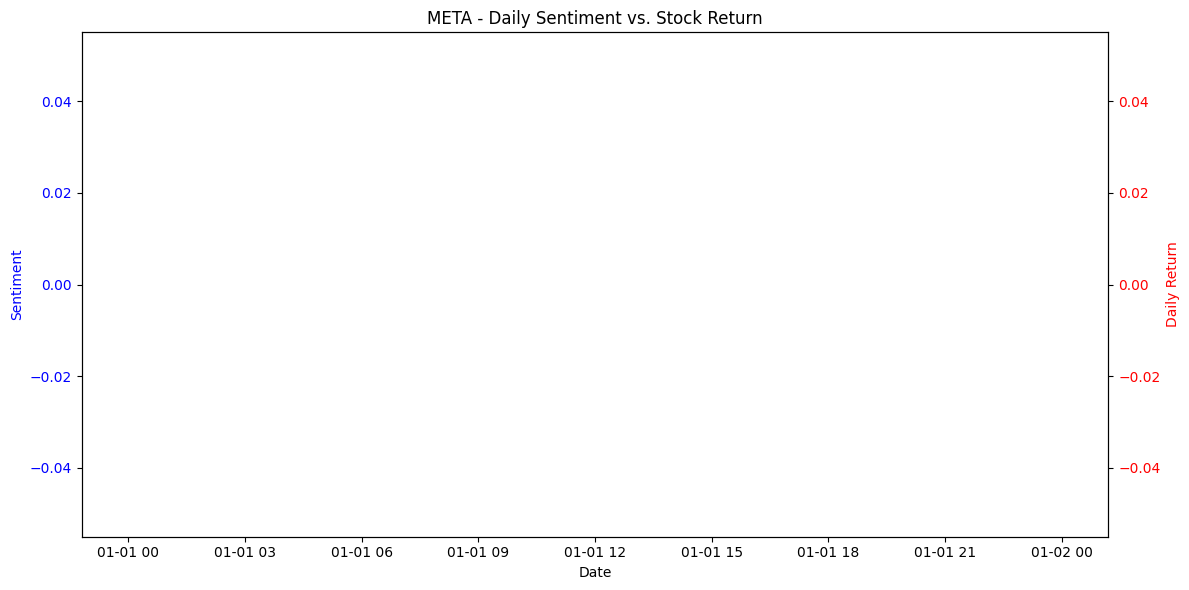

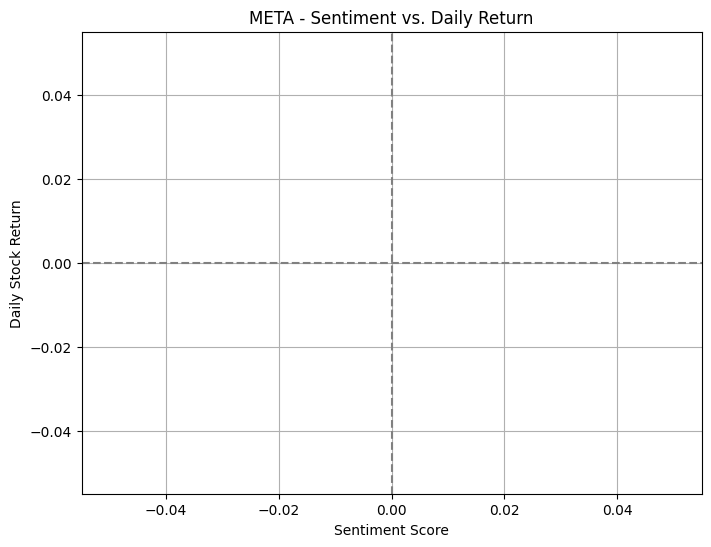


 Analyzing TSLA...
 Correlation between sentiment and return for TSLA: 0.0827


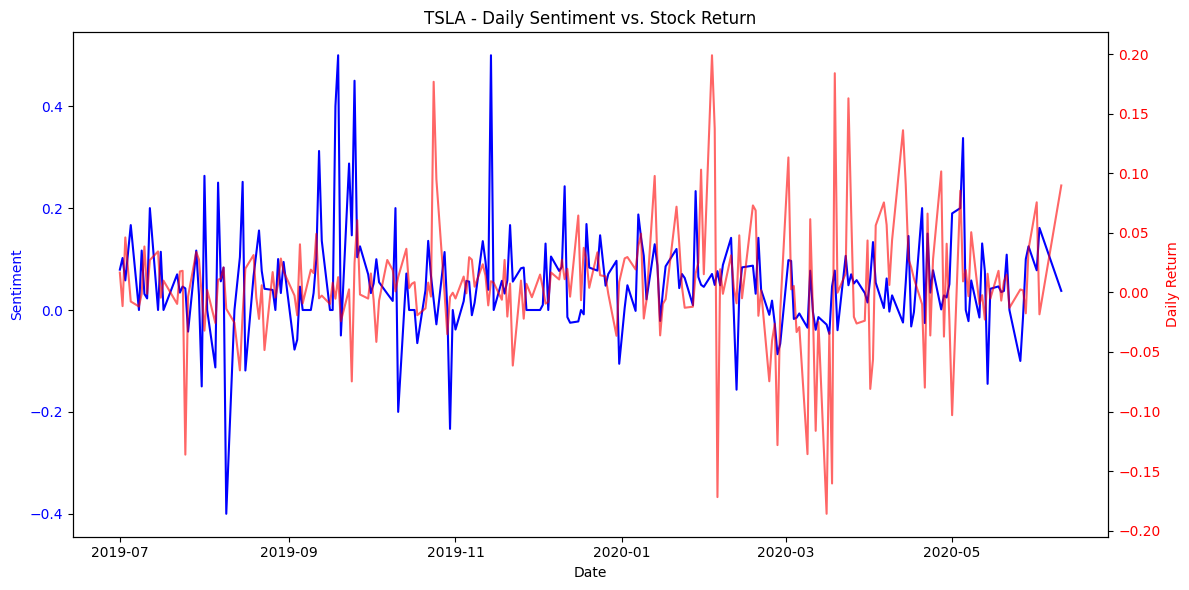

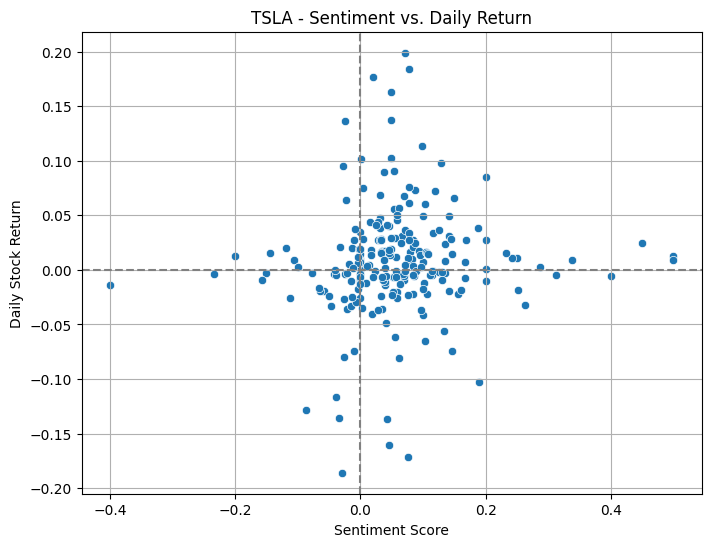


 Analyzing MSFT...
 Correlation between sentiment and return for MSFT: nan


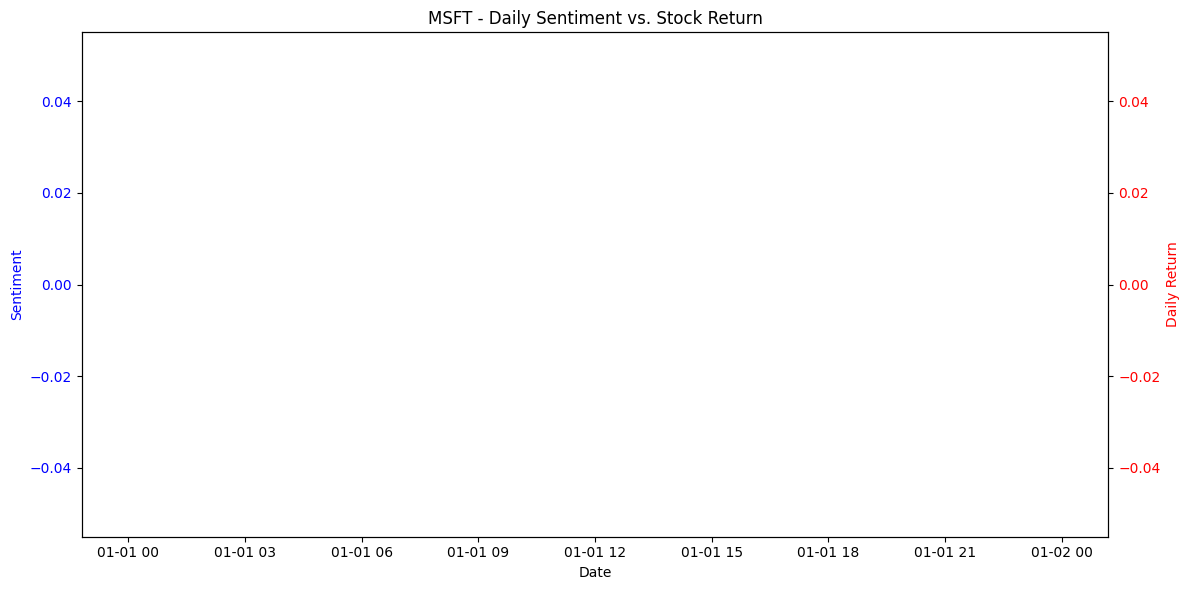

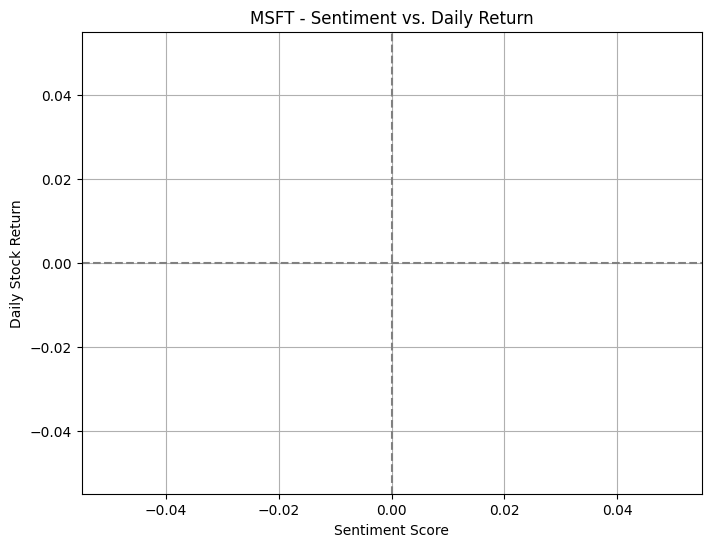


 Analyzing GOOGL...
 Stock file for GOOGL not found at data/GOOGL_historical_data.csv. Skipping.

 Analyzing AAPL...
 Correlation between sentiment and return for AAPL: 0.1589


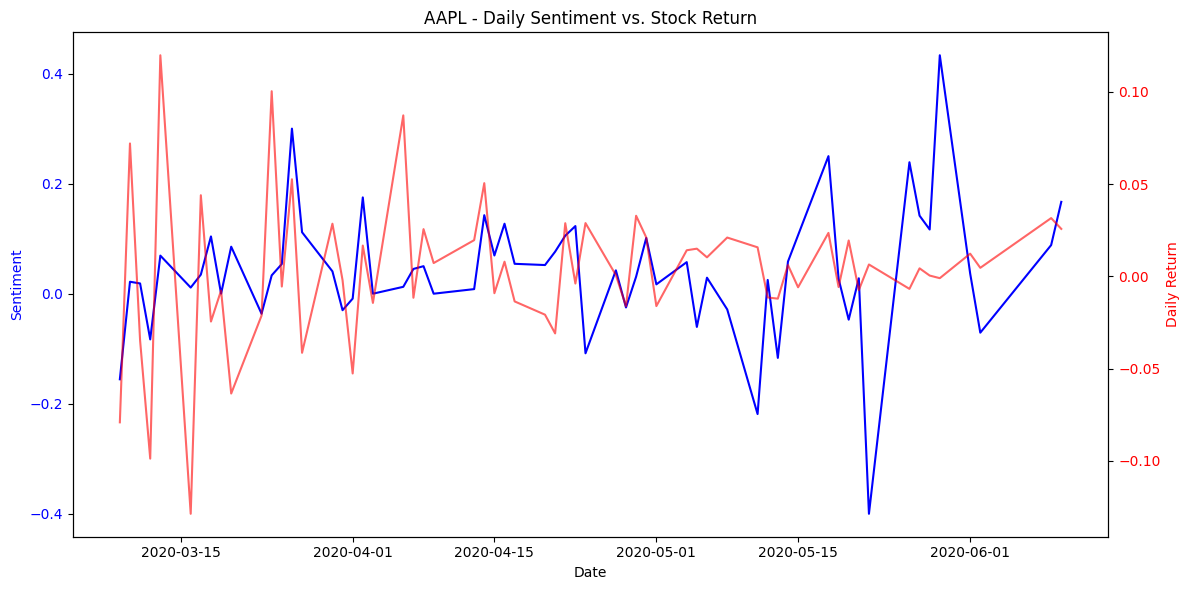

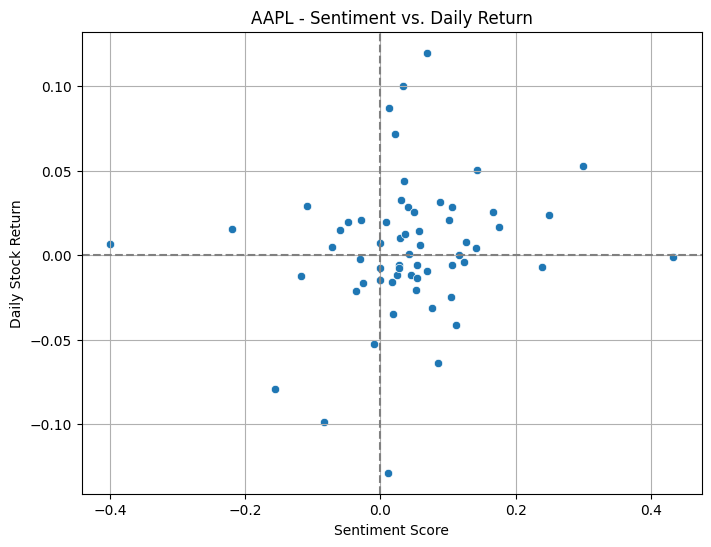

In [2]:
import pandas as pd
from scripts.news_stock_correlation import SentimentCorrelationAnalyzer
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Define stock data paths and associated tickers
stock_files = {
    "META": "data/META_historical_data.csv",
    "TSLA": "data/TSLA_historical_data.csv",
    "MSFT": "data/MSFT_historical_data.csv",
    "AAPL": "data/AAPL_historical_data.csv",
    "AMZN": "data/AMZN_historical_data.csv",
    "NVDA": "data/NVDA_historical_data.csv",
    "GOOG": "data/GOOG_historical_data.csv",
}

# Load the main news file
news_df = pd.read_csv("data/raw_analyst_ratings.csv")
news_df['date'] = pd.to_datetime(news_df['date'], format='ISO8601').dt.date
tickers = ["META", "TSLA", "MSFT", "GOOGL", "AAPL"]
# Loop through each ticker and analyze correlation
for ticker in tickers:
    print(f"\n Analyzing {ticker}...")

    news_ticker_df = news_df[news_df['stock'] == ticker]
    stock_file = f"data/{ticker}_historical_data.csv"

    if not os.path.exists(stock_file):
        print(f" Stock file for {ticker} not found at {stock_file}. Skipping.")
        continue

    stock_df = pd.read_csv(stock_file)

    try:
        analyzer = SentimentCorrelationAnalyzer(stock_df, news_ticker_df) 
        correlation, aligned_df = analyzer.compute_correlation()
        print(f" Correlation between sentiment and return for {ticker}: {correlation:.4f}")
        plot_sentiment_vs_return(aligned_df, ticker)
        plot_sentiment_return_scatter(aligned_df, ticker)

    except Exception as e:
        print(f" Failed to analyze {ticker}: {e}")
def plot_sentiment_vs_return(aligned_df, ticker):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_title(f"{ticker} - Daily Sentiment vs. Stock Return")
    ax1.set_xlabel("Date")
    ax1.plot(aligned_df.index, aligned_df['Sentiment'], color='blue', label='Sentiment')
    ax1.set_ylabel("Sentiment", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(aligned_df.index, aligned_df['Return'], color='red', alpha=0.6, label='Return')
    ax2.set_ylabel("Daily Return", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    fig.tight_layout()
    plt.show()

def plot_sentiment_return_scatter(aligned_df, ticker):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=aligned_df, x='Sentiment', y='Return')
    plt.title(f"{ticker} - Sentiment vs. Daily Return")
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.xlabel("Sentiment Score")
    plt.ylabel("Daily Stock Return")
    plt.grid(True)
    plt.show()
